# License Plate Recognition

**Problem Statement:**
License Plate Recognition (LPR) is a crucial task in intelligent transportation systems, involving the detection and recognition of vehicle license plates from images. The challenge lies in accurately identifying the location of license plates in vehicle images and extracting alphanumeric text from them, despite variations in lighting, angles, and plate designs. The dataset comprises 900 vehicle images with labeled bounding boxes for plates, 900 standalone license plate images with annotated text, and a test set of 201 images. The goal is to build a robust model capable of detecting and recognizing license plates with high accuracy.

**Business Goal:**
The objective is to develop an automated License Plate Recognition (LPR) system that enhances security, law enforcement, and traffic management by accurately identifying vehicles through their license plates. A successful model can be deployed for automatic toll collection, parking management, stolen vehicle tracking, and traffic monitoring, reducing manual effort and increasing efficiency in vehicle identification systems. The system will be evaluated based on its character recognition accuracy, ensuring reliable performance in real-world applications.

# Image Loading and Visualization

**1. Imports Libraries**
 - cv2, numpy, matplotlib.pyplot, and pandas for image processing and visualization.

**2. Defines Paths**
 - Sets paths for vehicle images and license plate images datasets.

**3. Loads an Image**
 - Reads a sample vehicle image (17.jpg) using OpenCV (cv2.imread).

**4. Checks for Errors**
 - If the image is not found or fails to load, it prints an error message.

**5. Processes the Image**
 - Converts the image from BGR to RGB (since OpenCV loads images in BGR format, but Matplotlib expects RGB).

**6. Displays the Image**
 - Uses plt.imshow() to visualize the image without axis labels.

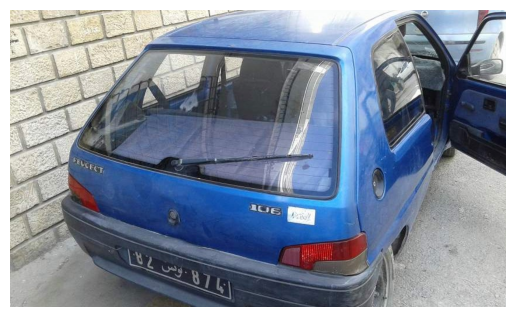

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define paths
vehicle_images_path = (r"C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\Licplatesdetection_train")
license_plate_images_path = (r"C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\Licplatesrecognition_train")

# Correct image path
image_path = r"C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\Licplatesdetection_train\Images\17.jpg"

# Load the image
sample_image = cv2.imread(image_path)

# Check if image is loaded correctly
if sample_image is None:
    print("Error: Image not found or could not be loaded.")
else:
    # Convert from BGR to RGB
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

    # Show image
    plt.imshow(sample_image)
    plt.axis("off")
    plt.show()

# Preprocessing functions for vehicle and license plate images. 

**1. preprocess_image(image_path, target_size=(416, 416))**
 - Loads an image from the given path.
 - Converts it from BGR to RGB (since OpenCV loads images in BGR format).
 - Resizes the image to 416×416 pixels for model consistency.
 - Normalizes pixel values by scaling them between 0 and 1 (dividing by 255).
 - Returns the preprocessed image.

**2. preprocess_license_plate(image)**
 - Converts the input license plate image to grayscale.
 - Applies Otsu’s thresholding, which automatically selects a threshold to convert the image to black-and-white (binary format) for better text
   recognition.
 - Returns the thresholded image.

**Purpose:**

 - preprocess_image prepares vehicle images for object detection models.
 - preprocess_license_plate enhances license plate images for Optical Character Recognition (OCR).

In [5]:
def preprocess_image(image_path, target_size=(416, 416)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize
    return image

def preprocess_license_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

# Preprocesses for Optical Character Recognition (OCR)

**1. preprocess_image(image_path, target_size=(416, 416))**
 - Loads an image from the given path.
 - Raises an error if the image is not found or unreadable.
 - Converts it from BGR to RGB for correct color representation.
 - Resizes it to 416×416 pixels for model consistency.
 - Normalizes pixel values between 0 and 1, then rescales them back to uint8 format for further processing.

**2. preprocess_license_plate(image)**
 - Raises an error if the license plate image is empty.
 - Converts the image to grayscale for better OCR performance.
 - Applies Gaussian blur to reduce noise.
 - Uses Otsu’s thresholding to convert the image to binary (black-and-white) format, enhancing character visibility.

**3. Image Processing & Display:**
 - Loads and preprocesses a full vehicle image using preprocess_image().
 - Attempts to process the license plate image (though the actual license plate extraction step is missing).
 - Displays the thresholded license plate image using matplotlib, after converting it to RGB for proper visualization.

**Purpose:**
 - preprocess_image ensures the vehicle image is in a consistent format for license plate detection.
 - preprocess_license_plate prepares the extracted plate for OCR-based character recognition.

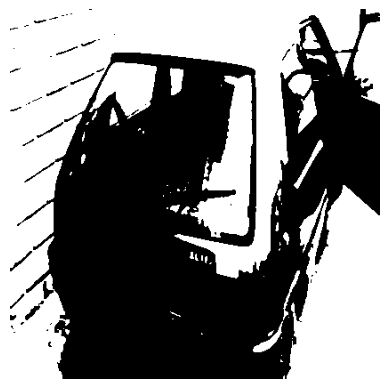

In [6]:
import cv2

def preprocess_image(image_path, target_size=(416, 416)):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Image not found or cannot be read!")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize
    image = (image * 255).astype("uint8")
    return image

def preprocess_license_plate(image):
    if image is None:
        raise ValueError("Error: License plate image is empty!")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)  # Reduce noise
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Adaptive thresholding
    return thresh

# Define the image path
image_path = r"C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\Licplatesdetection_train\Images\17.jpg"  # Change this to your actual image path

# First, preprocess the full image
image = preprocess_image(image_path)

# Then, process the detected license plate (you need to extract the plate first)
thresh = preprocess_license_plate(image)  # Replace with cropped license plate

# Show the processed license plate
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.axis('off')  # Hide axis
plt.show()


# YOLOv8 (You Only Look Once) for license plate detection

 - Imports YOLO from Ultralytics – Loads the YOLOv8 model for object detection.
 - Loads a Pretrained YOLOv8 Model – Uses a YOLOv8 model file (yolov8n.pt) from the given path.
 - Runs Inference on a Dataset – Uses the model to process data.yaml, which likely contains image paths and annotation details for license plate detection.

**Purpose:**
 - Detects license plates from vehicle images using YOLOv8.
 - Can be extended to train or fine-tune the model on a custom dataset.

In [10]:
from ultralytics import YOLO
model = YOLO(r"C:\Users\sowmy\Downloads\yolov8n (1).pt")
#results = model(r"C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\License Plates.v1i.yolov11\data.yaml")  # Test on an image


# license plate detection using a pretrained YOLOv8 model and displays the results

**1. Runs YOLOv8 Model on an Image**
 - Processes 918.jpg with a confidence threshold of 0.25.

**2. Extracts Detection Results**
 - The model identifies bounding boxes around detected license plates.

**3. Visualizes the Detection**
 - r.plot() overlays bounding boxes on the image.
 - Displays the image using OpenCV (cv2.imshow).
 - Waits for a key press before closing the image window (cv2.waitKey(0)).

**4. Performance Metrics (Example Output):**
 - Image Resolution: 480x640
 - Detected Objects: 1 license plate
 - Processing Speed:
   - Preprocessing: 5.8ms
   - Inference: 18.4ms
   - Postprocessing: 3.2ms

**Purpose:**
 - Uses YOLOv8 for real-time license plate detection.
 - Displays the detected bounding box around the plate.
 - Can be extended for automated vehicle tracking or OCR-based recognition.

In [18]:

import cv2
results = model(r"C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\test\test\test\918.jpg", conf=0.25)
for r in results:
    im_array = r.plot()  # Get image with bounding boxes
    cv2.imshow("YOLO Detection", im_array)
    cv2.waitKey(0)  # Wait for key press
    cv2.destroyAllWindows()  # Close the image window



image 1/1 C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\test\test\test\918.jpg: 480x640 1 license plates, 18.4ms
Speed: 5.8ms preprocess, 18.4ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)


# Trains a YOLOv8 model for license plate detection 

**Key Training Details:**
 - Dataset: "data.yaml" (custom license plate dataset).
 - Epochs: 5 (short training session).
 - Image Size: 640×640 pixels.
 - Device: GPU (device=0) for faster training.

**Training Results:**
 - Precision: 93.41% (model's ability to avoid false positives).
 - Recall: 100% (model detected all actual license plates).
 - mAP@50: 99.5% (high detection accuracy).
 - mAP@50-95: 69.65% (performance across different IoU thresholds).
 - Fitness Score: 0.72635 (overall model performance).
 - Training Speed:
   - Preprocessing: 0.92ms
   - Inference: 12.65ms per image.

**Purpose:**
 - Trains a YOLOv8 model to detect license plates & cars.
 - High recall & precision suggest a well-performing detection model.



In [11]:
model.train(data="C:/Users/sowmy/Desktop/Vehicle_plate_numbers_project/License Plates.v1i.yolov11/data.yaml", epochs=5, imgsz=640, device=0)


Ultralytics YOLOv8.0.200  Python-3.12.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=C:\Users\sowmy\Downloads\yolov8n (1).pt, data=C:/Users/sowmy/Desktop/Vehicle_plate_numbers_project/License Plates.v1i.yolov11/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train59, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augme

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002DC320F6600>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

# Optical Character Recognition (OCR) on a license plate image using Tesseract OCR.

Extracts alphanumeric text from a license plate using Tesseract OCR.

Can be integrated into a license plate recognition pipeline for automated vehicle identification.

In [21]:
#!sudo apt install tesseract-ocr
#!pip install pytesseract

import pytesseract

def ocr_license_plate(image):
    text = pytesseract.image_to_string(image, config="--psm 7")
    return text.strip()

# Load a sample license plate image
license_plate = cv2.imread(r"C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\Licplatesrecognition_train\Images\18.jpg")
license_plate = preprocess_license_plate(license_plate)

# Perform OCR
text = ocr_license_plate(license_plate)
print("Detected License Plate:", text)


Detected License Plate: 4536-79222)


# Automates license plate detection with YOLO and text recognition with Tesseract OCR.

**1. License Plate Detection (YOLOv8)**
 - Loads the image 918.jpg and runs the YOLO model to detect a license plate.
 - Extracts bounding box coordinates to crop the license plate.

**2. License Plate Character Recognition (OCR)**
 - Preprocesses the cropped license plate image (preprocess_license_plate).
 - Uses Tesseract OCR to extract the text.

**3. Prints the Final Output**
 - Detection Performance:
   - Image Size: 480x640
   - 1 License Plate Detected
   - Processing Speed:
     - Preprocessing: 7.0ms
     - Inference: 18.3ms
     - Postprocessing: 4.0ms
 - Detected License Plate Output:
   - Final OCR Result: "47 3 1187" (misrecognized spacing in characters)

**Purpose:**
 - Automatically detects and extracts license plate numbers from images.
 - Can be used in traffic surveillance, toll systems, or vehicle identification.

In [22]:
def detect_and_recognize(image_path):
    # Step 1: Detect License Plate
    results = model(image_path)
    
    for r in results:
        for box in r.boxes:
            xmin, ymin, xmax, ymax = map(int, box.xyxy[0])
            img = cv2.imread(image_path)
            license_plate = img[ymin:ymax, xmin:xmax]

            # Step 2: OCR on detected license plate
            license_plate = preprocess_license_plate(license_plate)
            text = ocr_license_plate(license_plate)
            
            return text

# Run full pipeline on test image
test_text = detect_and_recognize(r"C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\test\test\test\918.jpg")
print("Final Detected Plate:", test_text)



image 1/1 C:\Users\sowmy\Desktop\Vehicle_plate_numbers_project\test\test\test\918.jpg: 480x640 1 license plates, 18.3ms
Speed: 7.0ms preprocess, 18.3ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)


Final Detected Plate: 47 3 1187


# Computes Intersection over Union (IoU), a key object detection metric.

**1. Extracts Bounding Box Coordinates**
 - box1 and box2 are the coordinates of two bounding boxes:
   - (xmin, ymin, xmax, ymax) format.
 - Computes the intersection region between the two boxes.

**2. Calculates Intersection Area**
 - Finds the overlapping width and height.
 - If there’s no overlap, inter_area = 0.

**3. Computes IoU Score**
 - IoU Formula:
          - **IoU = Intersection Area / Union Area**
 - Ensures values range between 0 (no overlap) and 1 (perfect match).

**Purpose:**
 - Measures the accuracy of object detection models by comparing predicted vs. actual bounding boxes.
 - Higher IoU means better detection performance.

In [23]:
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

# OCR accuracy using Levenshtein Distance.

**1. Imports Levenshtein Distance**
 - levenshtein_distance(pred_text, true_text) computes the minimum number of edits (insertions, deletions, substitutions) needed to transform one string into another.
 - Defines compute_ocr_accuracy(pred_text, true_text)
   - Computes OCR accuracy as:
 **Accuracy = 1 − Levenshtein Distance / max ( Length of Predicted Text, Length of True Text)**
 - Returns a value between 0 (completely incorrect) and 1 (perfect match).

**2. Runs an Example Calculation**
 - Predicted Text: "47 3 1187"
 - True Text: "47 1187"
 - Levenshtein Distance: 2 (due to extra space and a missing character).
 - Computed Accuracy: 0.7778 (77.78%).

**Purpose:**
 - Evaluates how well OCR extracts license plate text.
 - Can be used to compare and improve OCR performance by reducing errors.

In [29]:
from Levenshtein import distance as levenshtein_distance

def compute_ocr_accuracy(pred_text, true_text):
    return 1 - (levenshtein_distance(pred_text, true_text) / max(len(pred_text), len(true_text)))

# Example:
predicted_text = "47 3 1187"
true_text = "47 1187"
accuracy = compute_ocr_accuracy(predicted_text, true_text)
print("OCR Accuracy:", accuracy)

OCR Accuracy: 0.7777777777777778
